In [1]:
%pylab inline
import pandas as pd
import os
import scipy.stats

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Paths
DATADIR="/storage/mgymrek/chipmunk/fig1_eval"
OUTDIR=os.path.join(DATADIR, "pdfs")

FIG1COLOR = "darkblue"
FITCOLOR = "red"

Populating the interactive namespace from numpy and matplotlib


# Fragment length distribution examples

## Figure 1B

/home/mgymrek/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


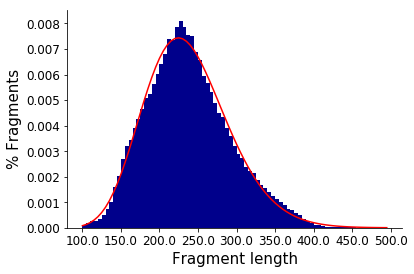

In [18]:
frags = [int(item.strip()) for item in open(os.path.join(DATADIR, "ENCFF545HSY.bam_200_577.frags.txt"), "r").readlines()]

mu = np.mean(frags)
v = np.var(frags)
shape = mu * mu / v
scale = v / mu
    
fig = plt.figure()
ax = fig.add_subplot(111)
bins = np.arange(100, 500, 5)
ax.hist(frags, bins=bins, normed=True, color=FIG1COLOR);
ax.plot(bins, scipy.stats.gamma(shape, 0, scale).pdf(bins), color=FITCOLOR);
ax.set_xlabel("Fragment length", size=15)
ax.set_ylabel("% Fragments", size=15)
ax.set_xticklabels(["%0.1f"%item for item in ax.get_xticks()], size=12)
ax.set_yticklabels(["%0.3f"%item for item in ax.get_yticks()], size=12);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom');
fig.savefig(os.path.join(OUTDIR, "Fig1_Fraglen.pdf"))

# Figure 1C - PCR

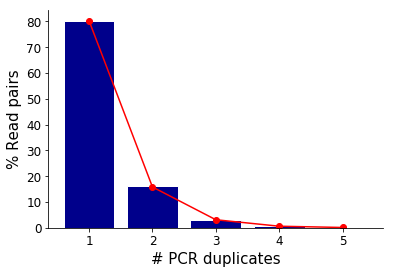

In [19]:
#python ../../experimental/view_pcr_dist.py /storage/pandaman/project/asimon-data/ENCFF431YXJ.marked.bam
#{1: 49516898, 2: 9968134, 3: 1900270, 4: 347474, 5: 62792, 6: 11394, 7: 2538, 8: 862, 9: 404, 10: 230, 11: 190, 12: 98, 13: 136, 14: 106, 15: 62, 16: 54, 17: 46, 18: 32, 19: 38, 20: 28, 21: 34, 22: 28, 23: 20, 24: 18, 25: 18, 26: 24, 27: 14, 28: 8, 29: 20, 30: 4, 31: 4, 32: 12, 33: 14, 34: 12, 35: 4, 36: 8, 37: 4, 38: 4, 39: 6, 40: 2, 41: 2, 42: 2, 44: 6, 46: 4, 49: 4, 50: 2, 51: 2, 52: 2, 53: 2, 59: 4, 60: 2, 62: 2, 63: 2, 64: 2, 70: 4, 91: 2, 96: 2, 97: 2, 99: 2, 127: 2, 128: 2, 130: 2, 135: 2, 139: 2, 144: 2, 154: 2, 159: 2, 160: 2, 161: 2, 540: 2, 170: 2, 187: 4, 202: 2, 209: 2, 211: 2, 217: 2, 231: 2, 241: 2, 251: 2, 254: 2, 257: 2, 260: 2, 267: 2, 270: 2, 293: 2, 303: 2, 308: 2, 315: 2, 319: 2, 327: 2, 346: 2, 391: 2, 393: 2}
#geometric distribution parameter p: 0.802812

pcr_data = {1: 49516898, 2: 9968134, 3: 1900270, 4: 347474, 5: 62792, 6: 11394, 7: 2538, 8: 862, 9: 404, 10: 230, 11: 190, 12: 98, 13: 136, 14: 106, 15: 62, 16: 54, 17: 46, 18: 32, 19: 38, 20: 28, 21: 34, 22: 28, 23: 20, 24: 18, 25: 18, 26: 24, 27: 14, 28: 8, 29: 20, 30: 4, 31: 4, 32: 12, 33: 14, 34: 12, 35: 4, 36: 8, 37: 4, 38: 4, 39: 6, 40: 2, 41: 2, 42: 2, 44: 6, 46: 4, 49: 4, 50: 2, 51: 2, 52: 2, 53: 2, 59: 4, 60: 2, 62: 2, 63: 2, 64: 2, 70: 4, 91: 2, 96: 2, 97: 2, 99: 2, 127: 2, 128: 2, 130: 2, 135: 2, 139: 2, 144: 2, 154: 2, 159: 2, 160: 2, 161: 2, 540: 2, 170: 2, 187: 4, 202: 2, 209: 2, 211: 2, 217: 2, 231: 2, 241: 2, 251: 2, 254: 2, 257: 2, 260: 2, 267: 2, 270: 2, 293: 2, 303: 2, 308: 2, 315: 2, 319: 2, 327: 2, 346: 2, 391: 2, 393: 2}

p = 0.802812

def GetPgeom(x, p):
    return (1-p)**(x-1)*(p)*100

xvals = [item for item in sorted(pcr_data.keys()) if item <=5]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(xvals, [pcr_data[x]*1.0/sum(pcr_data.values())*100 for x in xvals], color=FIG1COLOR, edgecolor="white")
ax.plot(xvals, [GetPgeom(x, p) for x in xvals], color=FITCOLOR, marker="o")
ax.set_xlabel("# PCR duplicates", size=15)
ax.set_ylabel("% Read pairs", size=15)
ax.set_xticklabels([int(item) for item in ax.get_xticks()], size=12)
ax.set_yticklabels([int(item) for item in ax.get_yticks()], size=12);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom');
fig.savefig(os.path.join(OUTDIR, "Fig1_PCR.pdf"))

## Supp Fig - bins

(0.6488306008097604, 0.0)
(0.9236567594493276, 0.0)


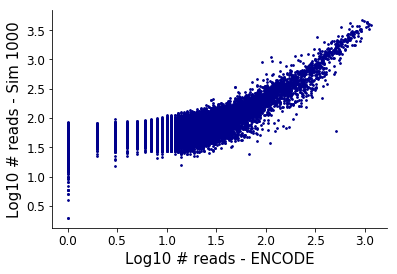

In [20]:
factor = "K562+SP1"
nc = 1000
enc_bins = pd.read_csv(os.path.join(DATADIR, factor+".ENCODE.cov.1kb.bed"), usecols=[3], names=["enc.counts"], sep="\t")
sim_bins = pd.read_csv(os.path.join(DATADIR, factor+".%s.cov.1kb.bed"%nc), usecols=[3], names=["sim.counts"], sep="\t")
bindata = pd.DataFrame({"enc.counts": enc_bins["enc.counts"], "sim.counts": sim_bins["sim.counts"]})

bindata = bindata[bindata["enc.counts"]+bindata["sim.counts"]>0]

# remove outliers. kosher?
bindata = bindata[(bindata["sim.counts"]<5000) & (bindata["enc.counts"]<5000)]

fig = plt.figure()
ax = fig.add_subplot(111)
pc = 1
ax.scatter(np.log10(bindata["enc.counts"]+pc), np.log10(bindata["sim.counts"]+pc), s=3, color=FIG1COLOR);
ax.set_xlabel("Log10 # reads - ENCODE", size=15)
ax.set_ylabel("Log10 # reads - Sim %s"%nc, size=15)
ax.set_xticklabels(["%0.1f"%item for item in ax.get_xticks()], size=12)
ax.set_yticklabels(["%0.1f"%item for item in ax.get_yticks()], size=12);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
print(scipy.stats.pearsonr(np.log10(bindata["enc.counts"]+pc), np.log10(bindata["sim.counts"]+pc)))
print(scipy.stats.pearsonr((bindata["enc.counts"]), (bindata["sim.counts"])))
bindata.apply(sum)
fig.savefig(os.path.join(OUTDIR, "SuppFig_BinsExample.pdf"))

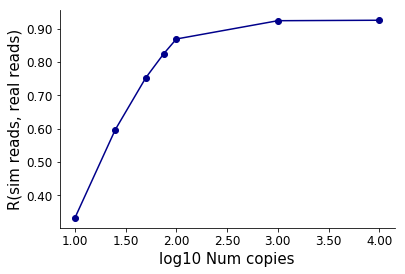

In [21]:
# get corr for different cell nums
enc_bins = pd.read_csv(os.path.join(DATADIR, factor+".ENCODE.cov.1kb.bed"), usecols=[3], names=["enc.counts"], sep="\t")

ncs = [10, 25, 50, 75, 100, 1000, 10000]
rvals = []
for nc in ncs:
    sim_bins = pd.read_csv(os.path.join(DATADIR, factor+".%s.cov.1kb.bed"%nc), usecols=[3], names=["sim.counts"], sep="\t")
    bindata = pd.DataFrame({"enc.counts": enc_bins["enc.counts"], "sim.counts": sim_bins["sim.counts"]})

    bindata = bindata[bindata["enc.counts"]+bindata["sim.counts"]>0]

    # remove outliers. kosher?
    bindata = bindata[(bindata["sim.counts"]<5000) & (bindata["enc.counts"]<5000)]

    r = scipy.stats.pearsonr((bindata["enc.counts"]), (bindata["sim.counts"]))[0]
    rvals.append(r)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(ncs), rvals, color=FIG1COLOR, marker="o");
ax.set_xlabel("log10 Num copies", size=15)
ax.set_ylabel("R(sim reads, real reads)", size=15)
ax.set_xticklabels(["%0.2f"%item for item in ax.get_xticks()], size=12)
ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig(os.path.join(OUTDIR, "SuppFig_BinsExample_vsNC.pdf"))